<a href="https://colab.research.google.com/github/vivirocha/Bootcamp_MachineLearning/blob/main/algoritmosML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando bibliotecas
from pandas import DataFrame
import matplotlib.pyplot as plt


In [ ]:
#Criando dados aleatórios
dados = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46], 
         'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
         }

In [ ]:
#Criando o dataframe
df = DataFrame(dados, columns=['x','y'])
df.head()

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


In [ ]:
#Adiciona as bibliotecas para construir o algoritmo
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
centroides = kmeans.cluster_centers_
print(centroides)

[[38.75       61.625     ]
 [47.07142857 22.14285714]]


Text(0, 0.5, 'y')

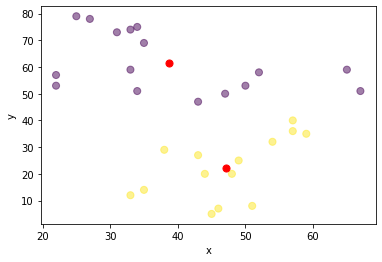

In [ ]:
#Realiza o plot do gráfico da saída
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroides[:,0], centroides[:, 1], c='red', s=50)
plt.xlabel("x")
plt.ylabel("y")

In [ ]:
#Importando as bibliotecas
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np


In [ ]:
#Criando a rotina para utilizar o dataset Iris
iris = datasets.load_iris()

In [ ]:
#converte o banco de dados iris para o dataframe
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df_iris.shape

(150, 5)

In [ ]:
#Transforma os dados em array
x = df_iris.iloc[:, :-1].values
y = df_iris.iloc[:, 4].values

In [ ]:
#Realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)


In [ ]:
#Realiza o processo de normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Treinamento do modelo
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
#Realiza a previsão
y_pred = classifier.predict(x_test)

In [ ]:
#Constrói a matrix de confusão para comparar com o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 10  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      0.91      0.95        11
         2.0       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



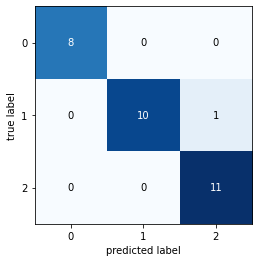

In [ ]:
#Realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
#Criando o objeto de classificação
clf = DecisionTreeClassifier()

#Realizando o treinamento do classificador
clf = clf.fit(x_train, y_train)

#Realizando a previsão de classificação
y_pred = clf.predict(x_test)

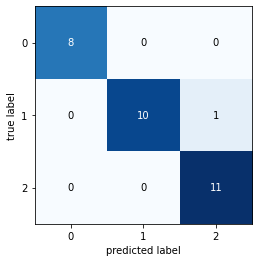

In [ ]:
#Avaliando o modelo
#Realizando o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [ ]:
#visualização da árvore de decisão
#Importando as bibliotecas para visualização da árvore de decisão
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

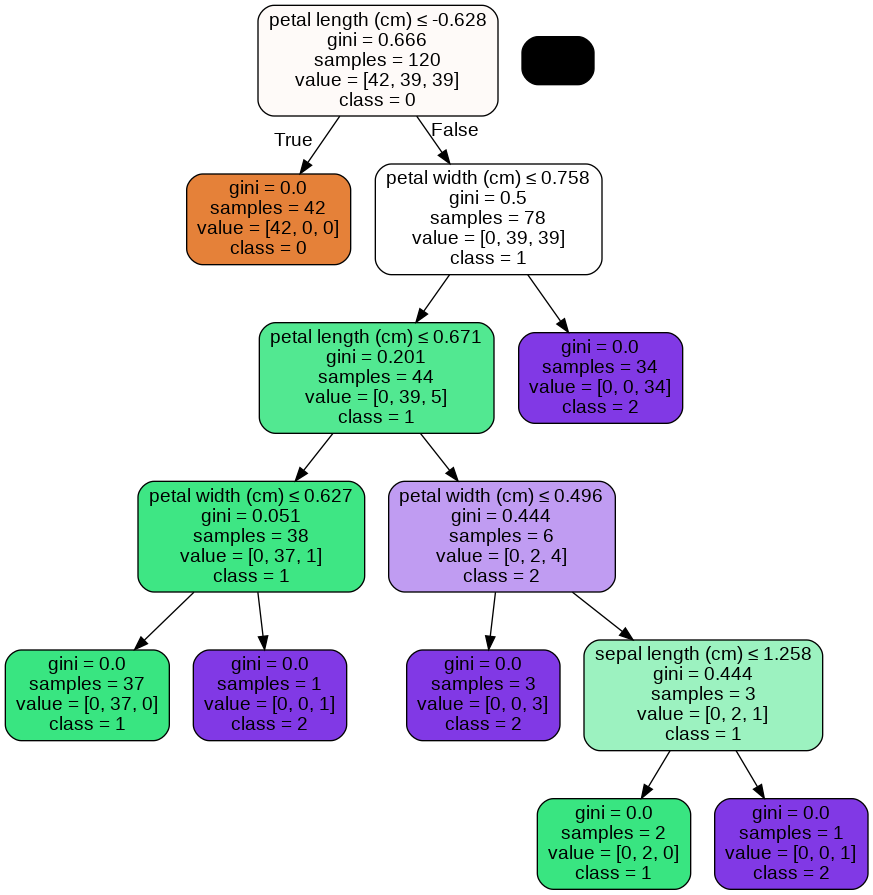

In [ ]:
#Construindo a árvore de decisão para o banco de dados Iris
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = iris.feature_names, class_names=['0', '1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

SVM


In [ ]:
#Importando biblioteca para construção do SVM
from sklearn.svm import SVC

In [ ]:
#Criando o objeto SVM
clf = SVC()

In [ ]:
#Realiza a classificação via SVM
clf.fit(x_train, y_train)

SVC()

In [ ]:
#realiza a previsão de classificação
y_pred = clf.predict(x_test)

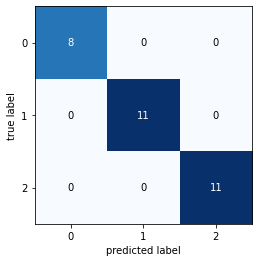

In [ ]:
#Avaliando o modelo
#Realizando o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()